<a href="https://colab.research.google.com/github/JuliaVazTostes/curso_data_science/blob/master/M%C3%B3dulo_1_Analisando_os_Dados_do_Airbnb_Amsterdm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# importar os pacotes (bibliotecas) necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2020-02-14/visualisations/listings.csv")


In [3]:
# Análise do dataset - mostrar as 5 primeiras entradas e identificar o tamanho da matriz (Número de linhas e colunas)7

df.shape

(19700, 16)

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,277,2019-11-21,2.09,1,37
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,100,1,321,2020-02-07,2.65,2,134
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.20,2,129
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,155,2,213,2020-02-10,2.16,1,163
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36719,4.89092,Private room,75,2,323,2020-02-10,2.80,3,114


In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar o tipo de variável de cada coluna
display(df.dtypes)

Entradas:	 19700
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
# amalisar todas as localizações disponíveis para a cidade de Amsterdã
df['neighbourhood'].unique()

array(['Oostelijk Havengebied - Indische Buurt', 'Centrum-Oost',
       'Centrum-West', 'Zuid', 'De Pijp - Rivierenbuurt',
       'De Baarsjes - Oud-West', 'Bos en Lommer', 'Westerpark',
       'Oud-Oost', 'Noord-West', 'Slotervaart', 'Oud-Noord',
       'Geuzenveld - Slotermeer', 'Watergraafsmeer',
       'IJburg - Zeeburgereiland', 'Noord-Oost', 'Gaasperdam - Driemond',
       'Buitenveldert - Zuidas', 'Bijlmer-Oost', 'De Aker - Nieuw Sloten',
       'Osdorp', 'Bijlmer-Centrum'], dtype=object)

In [7]:
# mostrar a quantidade de instaçaões por bairro - df.neighbourhood.value_counts()
# colocar "df_clean.room_type" é a mesma coisa de colocar  "df_clean['room_type']"
#value_counts() soma as ocorrências de cada bairro
# mostrar a porcentagem de instaçaões por bairro - df.neighbourhood.value_counts() / df.shape[0]

df.neighbourhood.value_counts() / df.shape[0]

De Baarsjes - Oud-West                    0.168934
De Pijp - Rivierenbuurt                   0.125025
Centrum-West                              0.109391
Centrum-Oost                              0.087157
Westerpark                                0.073249
Zuid                                      0.070609
Oud-Oost                                  0.065888
Bos en Lommer                             0.057462
Oostelijk Havengebied - Indische Buurt    0.049289
Oud-Noord                                 0.030000
Watergraafsmeer                           0.027157
IJburg - Zeeburgereiland                  0.023909
Slotervaart                               0.021675
Noord-West                                0.019391
Noord-Oost                                0.014213
Buitenveldert - Zuidas                    0.012284
Geuzenveld - Slotermeer                   0.011523
De Aker - Nieuw Sloten                    0.007665
Osdorp                                    0.007005
Gaasperdam - Driemond          

In [8]:
# Transformar a informação de dados faltantes em porcentagem e ordenar em ordem decrescente as variáveis por seus valores ausentes
# df.isnull retorna onde tem valor faltando célula a célula.
# Se dividir os valores faltantes pelo núlero de linhas, dado pelo df.shape[0], eu obtenho em porcentagem
# sort_values (ascendig=False) rankeia as colunas com os valores por recorrência
# .sum soma todos os valores faltantes por coluna

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.112690
last_review                       0.112690
name                              0.001675
host_name                         0.000152
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

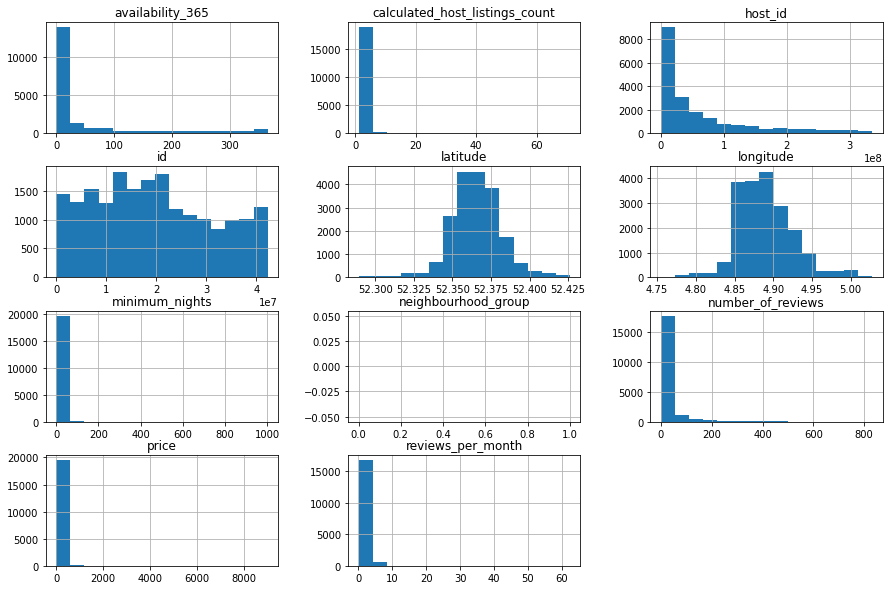

In [9]:
# gerar histogramas em escalas boas para visualização
# bins é a quantidade de "barrinhas" onde os dados vão ser divididos
# figsize é a dimensão do histograma

df.hist(bins=15, figsize=(15,10));

In [10]:
# análise de outliers e visualizar o resumo estatístico das variáveis numéricas
# Como existem colunas que não faz sentido realizar análise estatística, selecionou-se apenas algumas colunas do dataframe
# Observa-se que o desvio padrão esta muito grande, estando maior que a média
# A distribuição esta muito estranha, no preço, por exemplo, o valor máximo da diária é de R$9.000,00
# No numero minimo de dias para alugar tambem, o valor maximo em 1001 é outlier

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19700.000000,19700.000000,19700.000000,17480.000000,19700.000000,19700.000000
mean,162.811320,3.473756,25.120812,0.910237,2.036853,47.454264
std,187.969405,15.054733,53.312421,1.431441,5.423200,92.020394
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,99.000000,2.000000,3.000000,0.210000,1.000000,0.000000
50%,132.000000,2.000000,9.000000,0.480000,1.000000,0.000000
75%,186.250000,3.000000,24.000000,0.960000,1.000000,43.000000
max,9000.000000,1001.000000,831.000000,62.390000,71.000000,365.000000


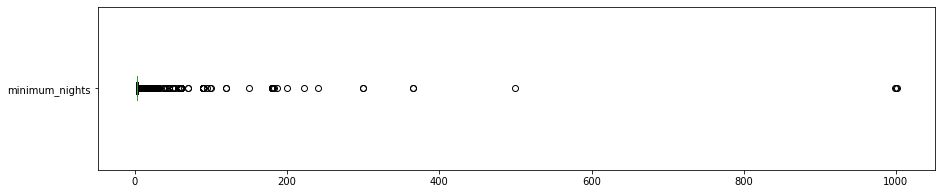

minimum_nights: valores acima de 20:
205 entradas
1.0406%


In [11]:
# plotar boxplot para analise
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 20:")
print("{} entradas".format(len(df[df.minimum_nights > 20])))
print("{:.4f}%".format((len(df[df.minimum_nights > 20]) / df.shape[0])*100))

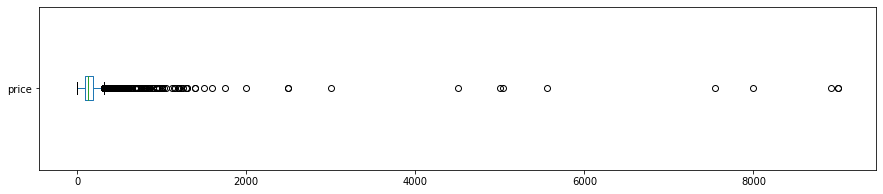


price: valores acima de 500
269 entradas
1.3655%


In [12]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 500")
print("{} entradas".format(len(df[df.price > 500])))
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

''

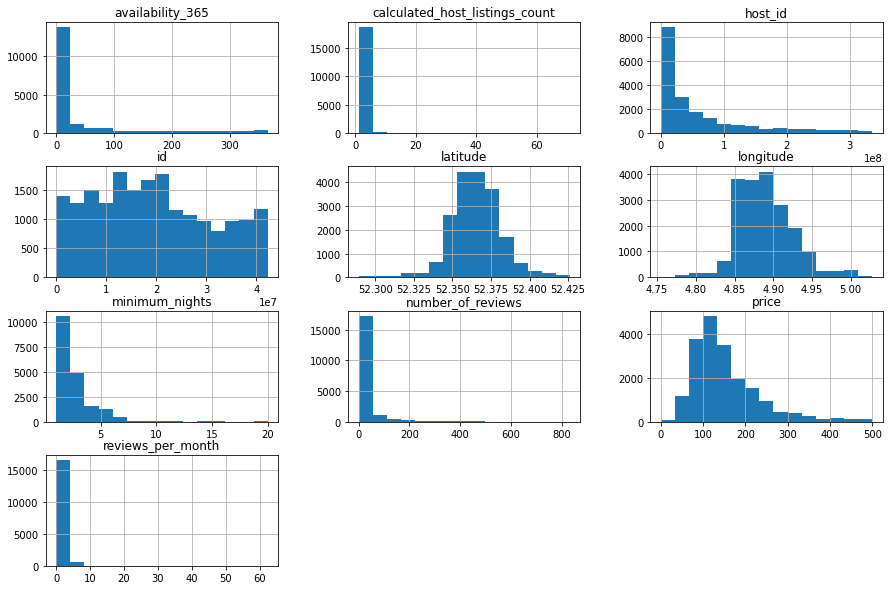

In [21]:
# remover os *outliers* em um novo DataFrame
# Retirou o que estava acima de R$500,00 a diária e com minimo de dias para alugar acima de 20 diárias
# df_clean é uma copia do dataframe para que o original não seja editado

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 20].index, axis=0, inplace=True)
;
# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10))
;

In [14]:
# criar uma matriz de correlação
# Correlação não é causa e efeito - influência de uma vatriável em outra
# .corr dá as correlações

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.036276,-0.106367,-0.087015,0.117414,0.178221
minimum_nights,0.036276,1.000000,-0.088191,-0.162795,0.031512,-0.033215
number_of_reviews,-0.106367,-0.088191,1.000000,0.702399,-0.015715,0.267353
reviews_per_month,-0.087015,-0.162795,0.702399,1.000000,0.029723,0.315006
calculated_host_listings_count,0.117414,0.031512,-0.015715,0.029723,1.000000,0.211854
availability_365,0.178221,-0.033215,0.267353,0.315006,0.211854,1.000000


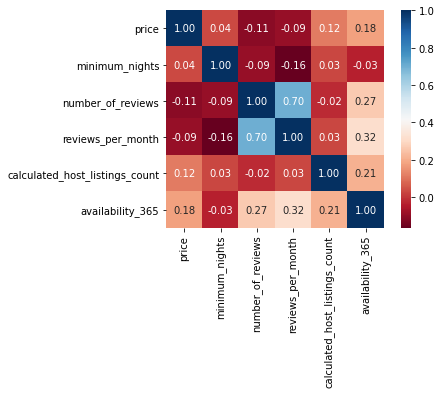

In [15]:
# seaborn é uma biblioteca de visualização - HEATMAP - MAPA DE CALOR para representar as correlações

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

In [16]:
# mostrar a quantidade de cada tipo de imóvel disponível
# colocar "df_clean.room_type" é a mesma coisa de colocar  "df_clean['room_type']"
#value_counts() soma as ocorrências de cada tipo de aluguel

df_clean.room_type.value_counts()

Entire home/apt    14985
Private room        3947
Hotel room           262
Shared room           47
Name: room_type, dtype: int64

In [17]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.778806
Private room       0.205135
Hotel room         0.013617
Shared room        0.002443
Name: room_type, dtype: float64

In [18]:
# groupby agrupa valores - Nesse caso agrupou todas as ocorrências por bairro, que esta na coluna 'neighbourhood' e tirou a média por bairro
# em função da coluna de bairros, me de a média dos preços -> Média dos preços por bairro
# .price é a coluna e mean é como eu quero trabalhar os dados agrupados, que nesse caso, foi a média do agrupamento de bairros
# sort_values ordena do menor para o maior
# [:10] indica que eu quero so a média dos 20 bairros com as maiores médias - do 0 ao 19

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:19]

neighbourhood
Centrum-West                              182.474576
Centrum-Oost                              179.748786
Zuid                                      166.923534
De Pijp - Rivierenbuurt                   158.009571
IJburg - Zeeburgereiland                  156.384615
Oud-Noord                                 149.505245
De Baarsjes - Oud-West                    147.086254
Oud-Oost                                  146.812938
Westerpark                                146.597183
Watergraafsmeer                           143.239544
Buitenveldert - Zuidas                    140.575107
Oostelijk Havengebied - Indische Buurt    129.210084
De Aker - Nieuw Sloten                    128.938776
Noord-West                                127.854881
Noord-Oost                                126.345455
Slotervaart                               122.964706
Bos en Lommer                             122.253812
Geuzenveld - Slotermeer                   121.886878
Osdorp                          

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

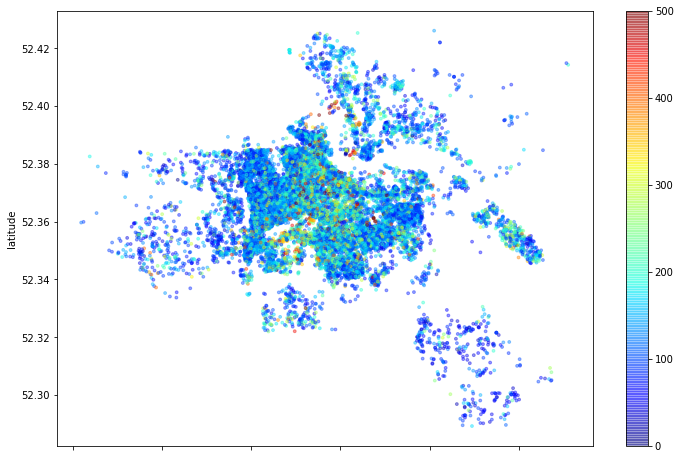

In [22]:
# plotar os imóveis pela latitude-longitude
# scatter é o tipo de gráfico - gráfico de pontos
# alpha é a transparência dos pontos
# c=df_clean['price'] indica que as cores vão acompanhar a coluna preço - quanto mais próximo do vermelho, mais caro é a diária

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));